In [104]:
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT, UnitaryGate
from qiskit.quantum_info import Statevector
from numpy import pi
import numpy as np
from helper import Uf

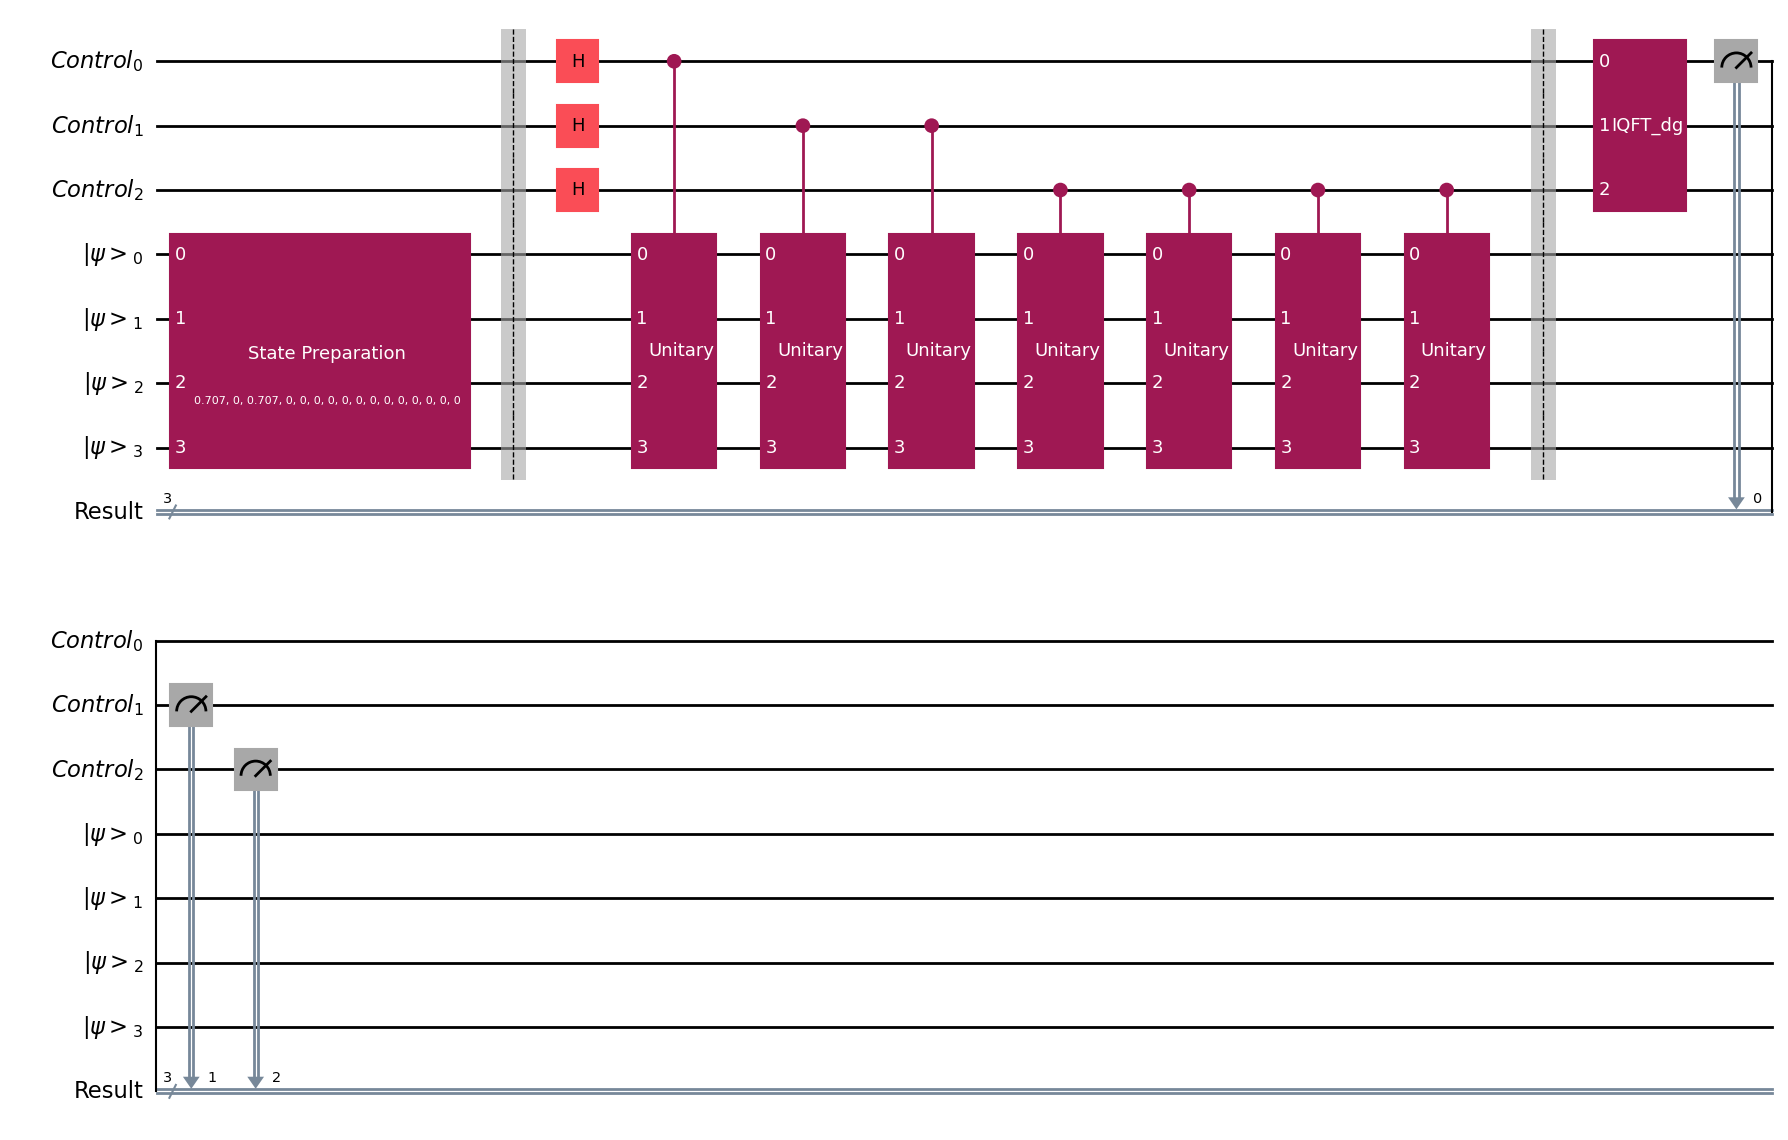

In [105]:
m = 3  # Number of control qubits

uf = UnitaryGate(Uf())
control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(4, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
state = Statevector([1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]/np.sqrt(2))
qc.prepare_state(state, [m+i for i in range(4)])
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        # qc.cp(2 * pi * theta, qubit, target_register)
        qc.append(uf.control(), [qubit, *target_register])
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
display(qc.draw(output="mpl"))

/tmp/ipykernel_12177/1768351024.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  result = Sampler().run(qc).result()


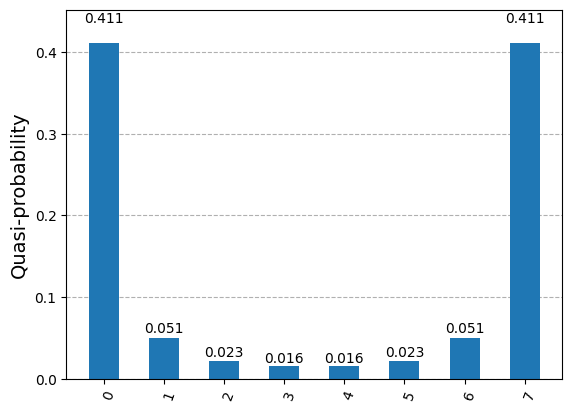

In [106]:
result = Sampler().run(qc).result()
display(plot_histogram(result.quasi_dists))